##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Decision Tree Learning
1 Implement the Decision Tree Learning algorithm to build a decision tree for a
given dataset.
2 Evaluate the accuracy and effectiveness of the decision tree on test data.
3Visualize and interpret the generated decision tree.**

### **Bhumika Shelar | T114**



In [ ]:
#Importing Necessary Libraries & Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/college_student_placement_dataset.csv')
print("dataframe of dataset created")

dataframe of dataset created


In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


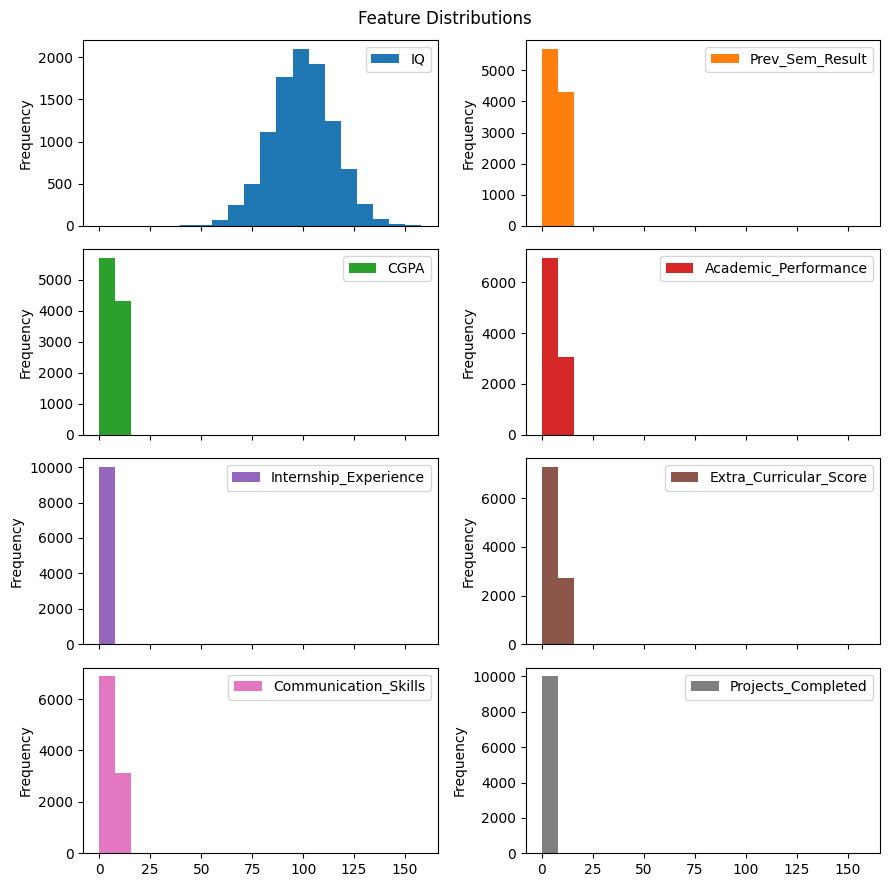

In [ ]:
df.iloc[:, 0:-1].plot(kind='hist', subplots=True, layout=(4, 2), figsize=(9, 9), bins=20, title='Feature Distributions')
plt.tight_layout() # Add tight_layout to prevent overlapping titles
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Placement'] = le.fit_transform(df['Placement'])
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])

df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


### **Cleaning Dataset**

In [ ]:
#finding NULL instances
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
df.groupby('CGPA')['Placement'].mean()

,Placement
CGPA,
4.54,0.000000
4.56,0.000000
4.57,0.000000
4.58,1.000000
4.59,0.333333
...,...
10.41,0.000000
10.42,0.000000
10.44,0.000000


In [ ]:
# Substituting NULL values in 'CGPA' with mean CGPA of each Placement group
df['CGPA'] = df.groupby('Placement')['CGPA'].transform(lambda x: x.fillna(x.mean()))

## **Doing train_test_split**

In [ ]:
X = df.drop(['Placement', 'College_ID'], axis=1)

# Target variable
y = df['Placement']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##**Training the Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## **Checking accuracy of testing dataset**

In [ ]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  99.9


## **Checking accuracy of training dataset**

In [ ]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

## **Visualizing decision tree**

In [ ]:

plt.figure(figsize=(15, 10))
tree.plot_tree(clf,
               filled=True,
               feature_names=X.columns,  # to show actual feature names
               class_names=['Not Placed', 'Placed'])  # adjust based on your classes
plt.title("Decision Tree Visualization")
plt.show()

NameError: name 'clf' is not defined

<Figure size 1500x1000 with 0 Axes>

## **Evaluating our test dataset**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2460
           1       0.99      1.00      1.00       540

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[2457    3]
 [   0  540]]


## **Evaluating our training dataset**

In [ ]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5881
           1       1.00      1.00      1.00      1119

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

[[5881    0]
 [   0 1119]]


## **Finding false positive rate and true positive rate**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert y_test to binary format
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Get prediction probabilities
dt_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary, dt_probs)

# Print results
print("FPR:", fpr_dt)
print("TPR:", tpr_dt)
print("Thresholds:", thresholds_dt)


FPR: [0.         0.00121951 1.        ]
TPR: [0. 1. 1.]
Thresholds: [inf  1.  0.]


## **Pruning of our decision tree**

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

## **Visualizing alpha w.r.t impurity of leaves**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

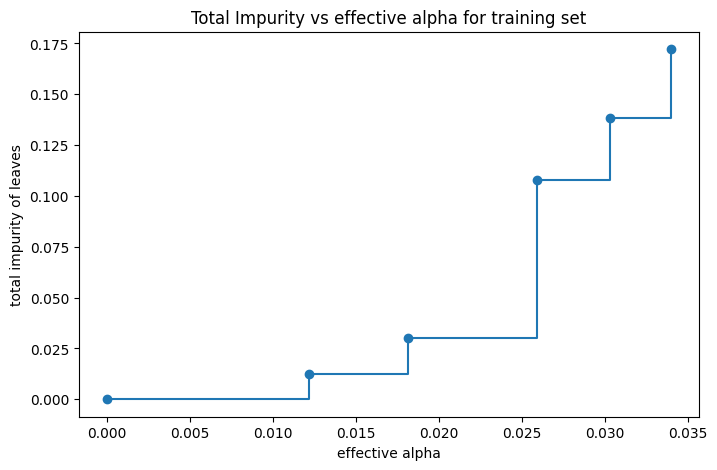

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    # Indent the lines within the loop
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04821921924453587


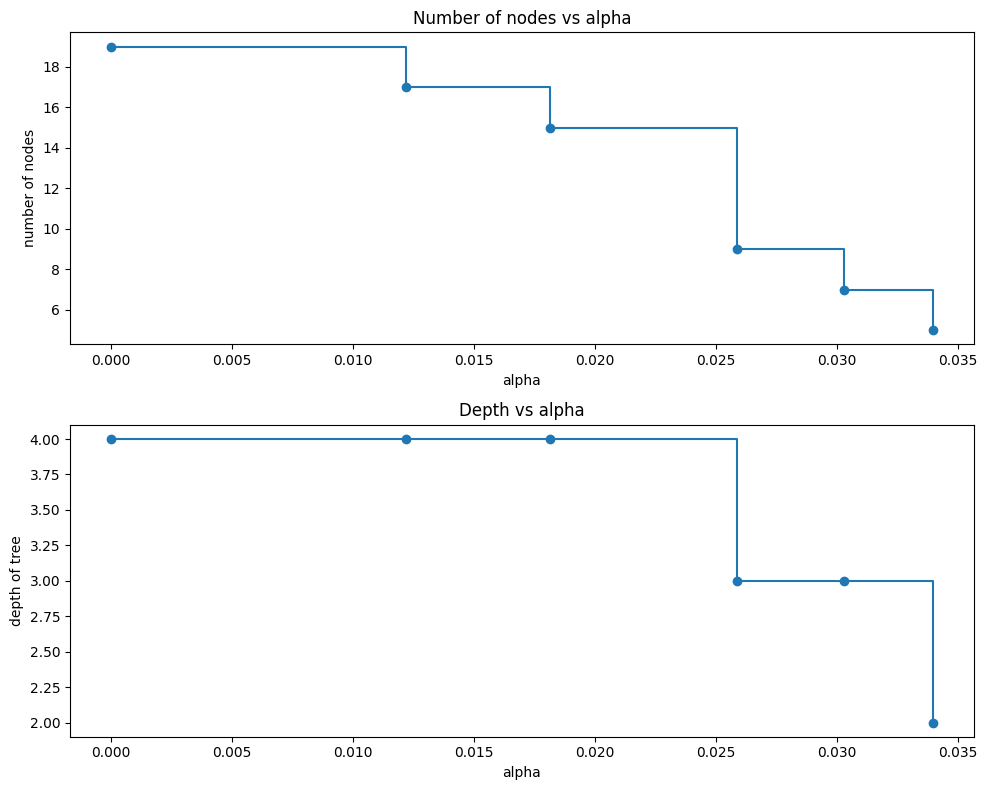

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

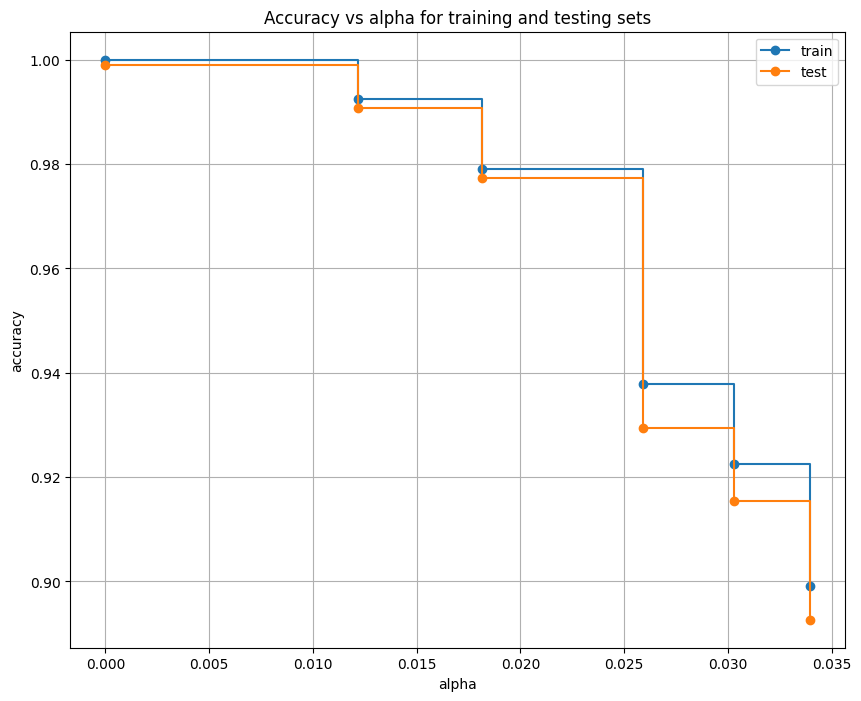

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

## **Accuracy after pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

## **Accuracy of test dataset**

In [ ]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.9906666666666667

## **Accuracy of training dataset**

In [ ]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.9924285714285714

## **Visualizing after pruning**

[Text(0.4230769230769231, 0.9, 'x[6] <= 7.5\ngini = 0.269\nsamples = 7000\nvalue = [5881, 1119]'),
 Text(0.15384615384615385, 0.7, 'x[0] <= 110.5\ngini = 0.112\nsamples = 4845\nvalue = [4556, 289]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 3724\nvalue = [3724, 0]'),
 Text(0.23076923076923078, 0.5, 'x[2] <= 8.005\ngini = 0.383\nsamples = 1121\nvalue = [832, 289]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 681\nvalue = [681, 0]'),
 Text(0.3076923076923077, 0.3, 'x[7] <= 1.5\ngini = 0.451\nsamples = 440\nvalue = [151, 289]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 151\nvalue = [151, 0]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 289\nvalue = [0, 289]'),
 Text(0.6923076923076923, 0.7, 'x[2] <= 7.995\ngini = 0.474\nsamples = 2155\nvalue = [1325, 830]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 110.5\ngini = 0.259\nsamples = 1308\nvalue = [1108, 200]

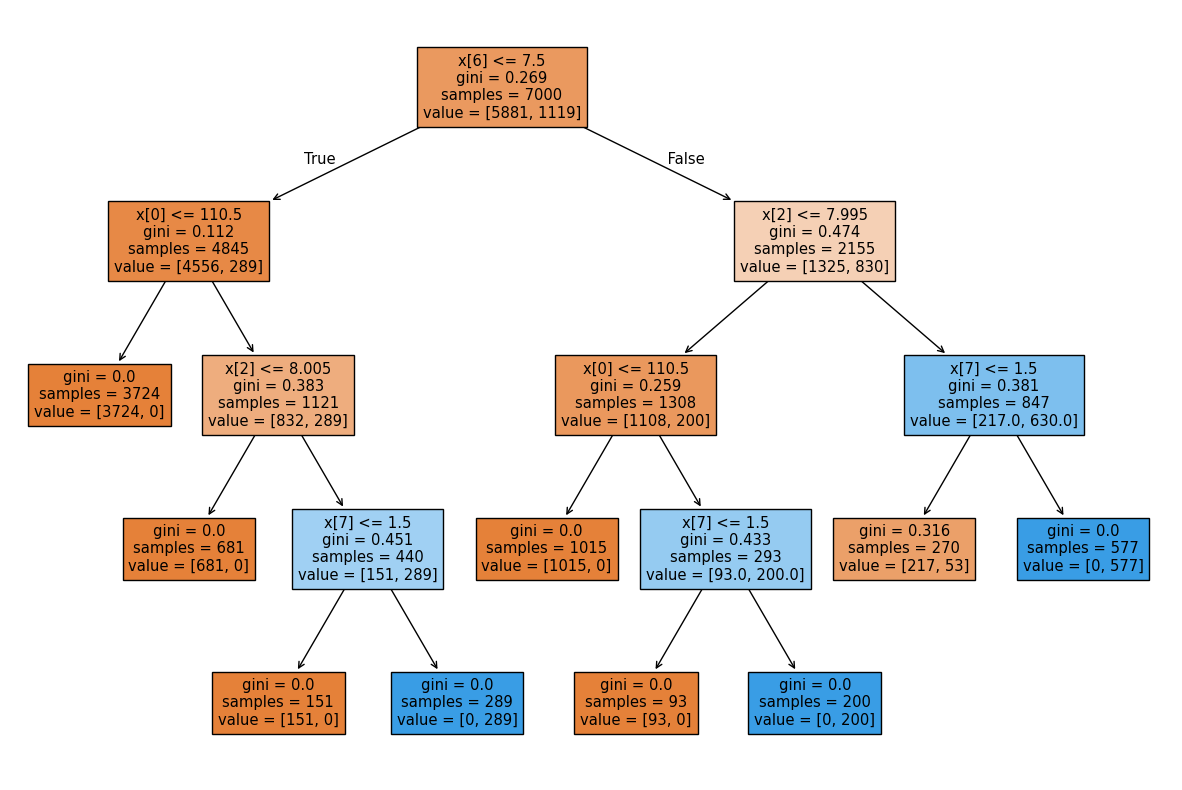

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

## **Training the model using entropy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## **Checking accuracy of testing dataset**

In [ ]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  99.9


## **Checking accuracy of training dataset**

In [ ]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

## **Visualizing our final decision tree (entopy)**

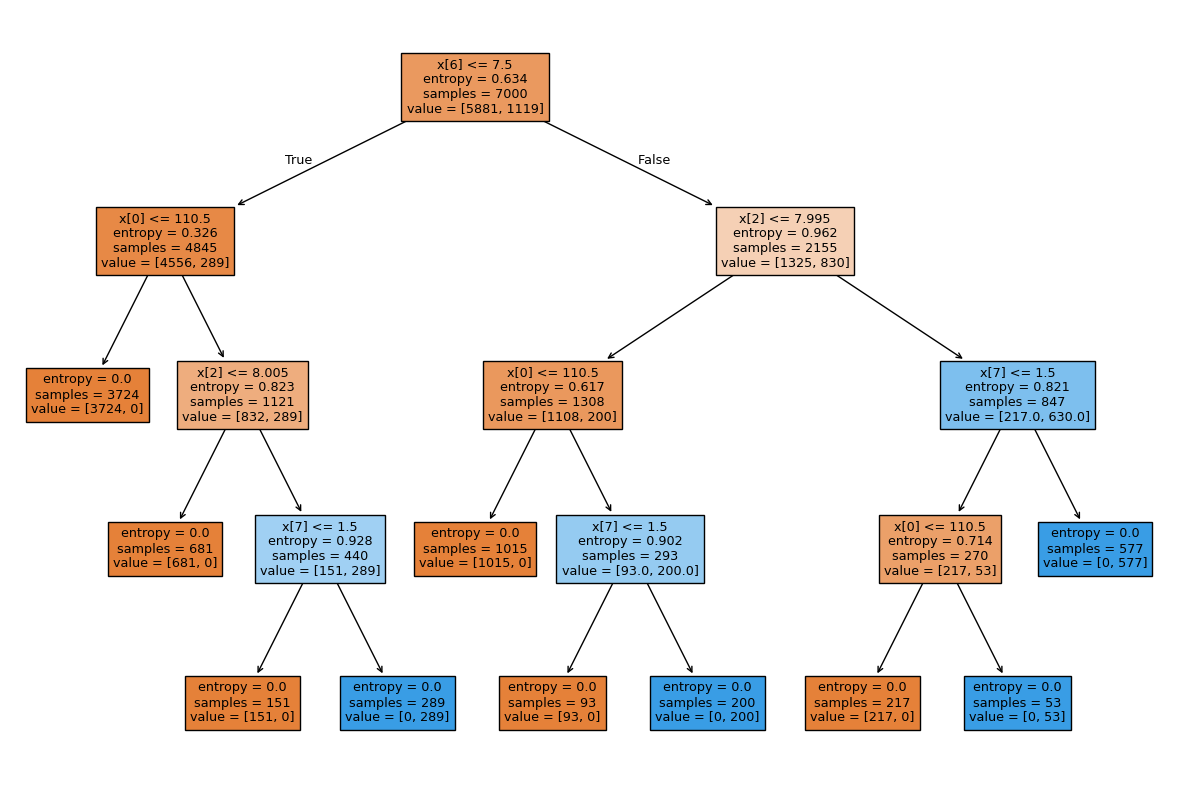

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()